# 가위바위보 분류기

## 1.1 손모양 데이터 수집
https://teachablemachine.withgoogle.com/ 이 사이트에서 손모양을 찍어서 다운받아서 나의 깃허브에 올렸다.   
손모양 사진   https://github.com/hahacandy/Aiffel_S/tree/main/EXPLORATION_DJ/1.%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%EA%B3%BC%20%EA%B0%80%EC%9C%84%EB%B0%94%EC%9C%84%EB%B3%B4%20%ED%95%98%EA%B8%B0/E1/rock_scissor_paper


## 1.2 하지만 사진이 224x224 사이즈이기때문에 예제에서 나온 28x28 사이즈로 변환


### 파이썬 코드를 사용하기위해 라이브러리들이 좀 필요하다

In [17]:
# PIL 라이브러리가 설치되어 있지 않다면 설치
# pip install pillow   

from PIL import Image
import os, glob
import numpy as np

### 나의 경우에는 폴더 경로가 바껴서 예제와는 조금 다르다

In [22]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/GitHub/Aiffel_S/EXPLORATION_DJ/1.Rock_Paper_Scissors/jupyter/rock_scissor_paper/"
print("이미지 디렉토리 경로: ", image_dir_path)

# 이미지 갯수를 측정하기 위함
images_nums = 0

# 이미지 사이즈 변환 함수
def changes_size(images, label):
    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img,"JPEG")
        global images_nums
        images_nums += 1
    print(label + " 이미지 resize 완료!")


paper_images=glob.glob(image_dir_path + "paper/*.jpg")  
rock_images=glob.glob(image_dir_path + "rock/*.jpg")  
scissor_images=glob.glob(image_dir_path + "scissor/*.jpg")  

changes_size(paper_images, "보")
changes_size(rock_images, "바위")
changes_size(scissor_images, "가위")

이미지 디렉토리 경로:  /home/aiffel/GitHub/Aiffel_S/EXPLORATION_DJ/1.Rock_Paper_Scissors/jupyter/rock_scissor_paper/
보 이미지 resize 완료!
바위 이미지 resize 완료!
가위 이미지 resize 완료!


## 1.3 저장된 사진을 훈련데이터로 불러오기

### 저장된 사진을 트레인 행렬에 담는다

In [23]:
def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=images_nums   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/GitHub/Aiffel_S/EXPLORATION_DJ/1.Rock_Paper_Scissors/jupyter/rock_scissor_paper/"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 310 입니다.
x_train shape: (310, 28, 28, 3)
y_train shape: (310,)


### 잘 불러졌는지 코드를 통해 확인해본다

라벨:  0


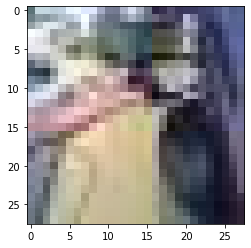

In [24]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

画質が悪くてあれは一体何だろうなぐらいのレベル